In [187]:
# ! wget http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip

/home/nizhikebinesi/fixed/classic-ml/venv_my/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## (Re)preparing otiginal data for applying LDA model

In [1]:
%config Completer.use_jedi = False
import gzip
import spacy
import textacy
from spacymoji import Emoji
from spacy_langdetect import LanguageDetector


def parse(path):
    g = gzip.open(path, 'r')
    for l in g:
        yield eval(l)

nlp = spacy.load("en_core_web_sm")#, disable=["tagger", "parser", "ner", "textcat"])
nlp.add_pipe(LanguageDetector(), name='language_detector', last=True)
emoji = Emoji(nlp)
nlp.add_pipe(emoji, first=True)

In [2]:
from spacy.attrs import ORTH, LEMMA, NORM, TAG
from spacy.lang.en.stop_words import STOP_WORDS
TOKENIZER_EXCEPTIONS = {
# do
    "don't": [
        {ORTH: "do", LEMMA: "do"},
        {ORTH: "n't", LEMMA: "not", NORM: "not", TAG: "RB"}],
    "doesn't": [
        {ORTH: "does", LEMMA: "do"},
        {ORTH: "n't", LEMMA: "not", NORM: "not", TAG: "RB"}],
    "didn't": [
        {ORTH: "did", LEMMA: "do"},
        {ORTH: "n't", LEMMA: "not", NORM: "not", TAG: "RB"}],
# can
    "can't": [
        {ORTH: "ca", LEMMA: "can"},
        {ORTH: "n't", LEMMA: "not", NORM: "not", TAG: "RB"}],
    "couldn't": [
        {ORTH: "could", LEMMA: "can"},
        {ORTH: "n't", LEMMA: "not", NORM: "not", TAG: "RB"}],
# have
    "I've'": [
        {ORTH: "I", LEMMA: "I"},
        {ORTH: "'ve'", LEMMA: "have", NORM: "have", TAG: "VERB"}],
    "haven't": [
        {ORTH: "have", LEMMA: "have"},
        {ORTH: "n't", LEMMA: "not", NORM: "not", TAG: "RB"}],
    "hasn't": [
        {ORTH: "has", LEMMA: "have"},
        {ORTH: "n't", LEMMA: "not", NORM: "not", TAG: "RB"}],
    "hadn't": [
        {ORTH: "had", LEMMA: "have"},
        {ORTH: "n't", LEMMA: "not", NORM: "not", TAG: "RB"}],
# will/shall will be replaced by will
    "I'll'": [
        {ORTH: "I", LEMMA: "I"},
        {ORTH: "'ll'", LEMMA: "will", NORM: "will", TAG: "VERB"}],
    "he'll'": [
        {ORTH: "he", LEMMA: "he"},
        {ORTH: "'ll'", LEMMA: "will", NORM: "will", TAG: "VERB"}],
    "she'll'": [
        {ORTH: "she", LEMMA: "she"},
        {ORTH: "'ll'", LEMMA: "will", NORM: "will", TAG: "VERB"}],
    "it'll'": [
        {ORTH: "it", LEMMA: "it"},
        {ORTH: "'ll'", LEMMA: "will", NORM: "will", TAG: "VERB"}],
    "won't": [
        {ORTH: "wo", LEMMA: "will"},
        {ORTH: "n't", LEMMA: "not", NORM: "not", TAG: "RB"}],
    "wouldn't": [
        {ORTH: "would", LEMMA: "will"},
        {ORTH: "n't", LEMMA: "not", NORM: "not", TAG: "RB"}],
# be
    "I'm'": [
        {ORTH: "I", LEMMA: "I"},
        {ORTH: "'m'", LEMMA: "be", NORM: "am", TAG: "VERB"}]
}

In [3]:
%%time
reviews = list(parse("./data/australian_user_reviews.json.gz"))

CPU times: user 1.7 s, sys: 38.3 ms, total: 1.74 s
Wall time: 1.74 s


In [4]:
import warnings
warnings.filterwarnings('ignore')

In [7]:
# ! pip install spacy-langdetect

In [8]:
from tqdm import tqdm_notebook
data = []

for i, u in enumerate(tqdm_notebook(reviews)):
    for j, r in enumerate(u['reviews']):
        d = {
            'user_id': u['user_id'],
            'user_idx': i,
            'inner_review_idx': j
        }
        d.update(r)
        data.append(d)
for i in tqdm_notebook(range(len(data))):
    data[i]['review_idx'] = i
    data[i]['spacy_processed'] = nlp(data[i]['review'])

  0%|          | 0/25799 [00:00<?, ?it/s]

  0%|          | 0/59305 [00:00<?, ?it/s]

In [9]:
%config Completer.use_jedi = False

In [10]:
x = data[5]['spacy_processed']
x._.lang, x._.language

('en', {'language': 'en', 'score': 0.999997576920891})

In [11]:
[(x['spacy_processed']._.lang, x['spacy_processed']._.language, x['spacy_processed']) for x in data if x['spacy_processed']._.language['language'] != 'en']

[('en', {'language': 'ca', 'score': 0.9999961412794158}, Git gud),
 ('en', {'language': 'de', 'score': 0.9999953710586871}, ZIKA DO BAILE),
 ('en', {'language': 'sl', 'score': 0.9999962839567289}, love it),
 ('en', {'language': 'da', 'score': 0.9999932563948846}, mt bom),
 ('en', {'language': 'pt', 'score': 0.9999971727468919}, É muito bom),
 ('en',
  {'language': 'so', 'score': 0.9999971371283422},
  es la rajaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa),
 ('en', {'language': 'so', 'score': 0.9999979617538421}, Good game),
 ('en', {'language': 'tl', 'score': 0.9997997457860093}, AWESOME),
 ('en',
  {'language': 'es', 'score': 0.9999957109068789},
  Hermoso juego que nunca olvidare <3),
 ('en',
  {'language': 'th', 'score': 0.9999997257741438},
  ผมว่าคุ้มที่สุดเเห่งเกมที่ผมเล่นมาผมน่าจะเจอเกมนี้นานเเล้วชือไปเล่นไม่ผิดหวังเชือท่าอยากเล่นทำตามครับ                                                                 5 วิธีในการเก็บเงินเติมsteamเพือชือpayday 25การชือ

In [12]:
{x['spacy_processed']._.language['language'] for x in tqdm_notebook(data)}

  0%|          | 0/59305 [00:00<?, ?it/s]

{'UNKNOWN',
 'af',
 'ar',
 'bg',
 'ca',
 'cs',
 'cy',
 'da',
 'de',
 'en',
 'es',
 'et',
 'fi',
 'fr',
 'hr',
 'hu',
 'id',
 'it',
 'ja',
 'ko',
 'lt',
 'lv',
 'mk',
 'nl',
 'no',
 'pl',
 'pt',
 'ro',
 'ru',
 'sk',
 'sl',
 'so',
 'sq',
 'sv',
 'sw',
 'ta',
 'th',
 'tl',
 'tr',
 'uk',
 'vi',
 'zh-cn',
 'zh-tw'}

In [13]:
%%time
STOP_LANGS = {'th', 'ru', 'pt', 'de', 'uk', 'bg', 'es', 'da', 'zh-cn', 'zh-tw', 'ko', 'ja', 'UNKNOWN'}
new_data = list(filter(lambda x: x['spacy_processed']._.language['language'] not in STOP_LANGS, tqdm_notebook(data)))

  0%|          | 0/59305 [00:00<?, ?it/s]

CPU times: user 6min 5s, sys: 5.59 s, total: 6min 11s
Wall time: 6min 10s


In [14]:
len(new_data) / len(data)

0.8811230081780626

In [15]:
tmp = {x['spacy_processed']._.language['language'] for x in tqdm_notebook(new_data)}

  0%|          | 0/52255 [00:00<?, ?it/s]

In [16]:
tmp

{'af',
 'ar',
 'ca',
 'cs',
 'cy',
 'da',
 'de',
 'en',
 'es',
 'et',
 'fi',
 'fr',
 'hr',
 'hu',
 'id',
 'it',
 'ja',
 'ko',
 'lt',
 'lv',
 'mk',
 'nl',
 'no',
 'pl',
 'pt',
 'ro',
 'sk',
 'sl',
 'so',
 'sq',
 'sv',
 'sw',
 'ta',
 'th',
 'tl',
 'tr',
 'vi'}

In [17]:
# len(tmp), len(tmp - {'en'})

In [18]:
[(x['spacy_processed']._.lang, x['spacy_processed']._.language, x['spacy_processed']) for x in new_data if x['spacy_processed']._.language['language'] != 'en']

[('en', {'language': 'ca', 'score': 0.9999951806572152}, Git gud),
 ('en', {'language': 'sl', 'score': 0.9999945140127469}, love it),
 ('en',
  {'language': 'so', 'score': 0.9999996873637976},
  es la rajaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa),
 ('en',
  {'language': 'en', 'score': 0.7142843047174546},
  You won't regret playing it!),
 ('en', {'language': 'so', 'score': 0.8571411805616059}, Good game),
 ('en', {'language': 'tl', 'score': 0.999729839256525}, AWESOME),
 ('en', {'language': 'cy', 'score': 0.9999956351781619}, well dont),
 ('en', {'language': 'pl', 'score': 0.9999992936676927}, w,),
 ('en', {'language': 'sw', 'score': 0.9999950710699415}, Just amazing),
 ('en', {'language': 'vi', 'score': 0.5714265362982585}, -NO-NO-NO10/10),
 ('en', {'language': 'id', 'score': 0.9999942082438902}, bum),
 ('en',
  {'language': 'vi', 'score': 0.9999940811941954},
  THE SUN ♥♥♥♥♥♥♥♥♥♥♥♥, DO YOU PRAISE IT?PRAISE THE SUN!PRAISE THE SUN!PRAISE THE SUN!),
 ('en',

In [19]:
def is_english(s):
    try:
        s.encode(encoding='utf-8').decode('ascii')
    except UnicodeDecodeError:
        return False
    else:
        return True

In [20]:
non_english = set()
english = set()
for x in tqdm_notebook(new_data):
    if not is_english(x['review']):
        non_english.update(set(x['review']))
    else:
        english.update(set(x['review']))

  0%|          | 0/52255 [00:00<?, ?it/s]

In [21]:
non_english = non_english - english
non_english

{'\xa0',
 '¡',
 '£',
 '¨',
 '©',
 '¬',
 '\xad',
 '®',
 '¯',
 '°',
 '²',
 '³',
 '´',
 '·',
 '¸',
 'º',
 '½',
 '¾',
 '¿',
 'À',
 'Á',
 'Ã',
 'Ä',
 'Ç',
 'É',
 'Ê',
 'Ì',
 'Í',
 'Ñ',
 'Ó',
 'Ø',
 'Ú',
 'Ü',
 'à',
 'á',
 'â',
 'ã',
 'ä',
 'å',
 'æ',
 'ç',
 'è',
 'é',
 'ê',
 'ë',
 'ì',
 'í',
 'î',
 'ï',
 'ñ',
 'ò',
 'ó',
 'ô',
 'õ',
 'ö',
 'ù',
 'ú',
 'û',
 'ü',
 'ý',
 'ą',
 'ć',
 'č',
 'ď',
 'đ',
 'ē',
 'Ę',
 'ę',
 'Ě',
 'ě',
 'Ğ',
 'ğ',
 'ĩ',
 'İ',
 'ı',
 'ľ',
 'Ł',
 'ł',
 'ń',
 'ň',
 'ō',
 'ő',
 'Ř',
 'ř',
 'Ś',
 'ś',
 'Ş',
 'ş',
 'š',
 'ť',
 'ū',
 'ů',
 'ź',
 'Ż',
 'ż',
 'ž',
 'Ƒ',
 'ƒ',
 'ơ',
 'ư',
 'ƽ',
 'ə',
 'ɪ',
 'ʌ',
 'ʖ',
 'ʰ',
 'ʳ',
 'ˈ',
 '̅',
 '̲',
 '̶',
 '͜',
 '͡',
 'ι',
 'λ',
 'ω',
 'А',
 'Б',
 'Д',
 'Е',
 'И',
 'Л',
 'М',
 'Н',
 'О',
 'П',
 'Р',
 'С',
 'Т',
 'Х',
 'Ш',
 'Э',
 'Я',
 'а',
 'б',
 'в',
 'г',
 'д',
 'е',
 'з',
 'и',
 'й',
 'к',
 'л',
 'м',
 'н',
 'о',
 'п',
 'р',
 'с',
 'т',
 'у',
 'х',
 'ч',
 'ш',
 'щ',
 'ь',
 'э',
 'ю',
 'я',
 'ѕ',
 '҂',
 '҉',
 'ү',
 'ԁ',
 'Ե'

In [22]:
non_eng = {
 'ﾉ',
 'ﾌ',
 'ﾚ',
 '¿',
 'À',
 'Á',
 'Ã',
 'Ä',
 'Ç',
 'É',
 'Ê',
 'Ì',
 'Í',
 'Ñ',
 'Ó',
 'Ø',
 'Ú',
 'Ü',
 'à',
 'á',
 'â',
 'ã',
 'ä',
 'å',
 'æ',
 'ç',
 'è',
 'é',
 'ê',
 'ë',
 'ì',
 'í',
 'î',
 'ï',
 'ñ',
 'ò',
 'ó',
 'ô',
 'õ',
 'ö',
 'ù',
 'ú',
 'û',
 'ü',
 'ý',
 'ą',
 'ć',
 'č',
 'ď',
 'đ',
 'ē',
 'Ę',
 'ę',
 'Ě',
 'ě',
 'Ğ',
 'ğ',
 'ĩ',
 'İ',
 'ı',
 'ľ',
 'Ł',
 'ł',
 'ń',
 'ň',
 'ō',
 'ő',
 'Ř',
 'ř',
 'Ś',
 'ś',
 'Ş',
 'ş',
 'š',
 'ť',
 'ū',
 'ů',
 'ź',
 'Ż',
 'ż',
 'ž',
 'Ƒ',
 'ƒ',
 'ơ',
 'ư',
 'ƽ',
 'ə',
 'ɪ',
 'ʌ',
 'ʖ',
 'ʰ',
 'ʳ',
 'ˈ',
 '̅',
 '̲',
 '̶',
 '͜',
 '͡',
 'ι',
 'λ',
 'ω',
 'А',
 'Б',
 'Д',
 'Е',
 'И',
 'К',
 'Л',
 'М',
 'Н',
 'О',
 'П',
 'Р',
 'С',
 'Т',
 'Х',
 'Ш',
 'Э',
 'Я',
 'а',
 'б',
 'в',
 'г',
 'д',
 'е',
 'ж',
 'з',
 'и',
 'й',
 'к',
 'л',
 'м',
 'н',
 'о',
 'п',
 'р',
 'с',
 'т',
 'у',
 'ф',
 'х',
 'ч',
 'ш',
 'щ',
 'ы',
 'ь',
 'э',
 'ю',
 'я',
 'ѕ',
 '҂',
 '҉',
 'ү',
 'ԁ',
 'Ե',
 '،',
 'آ',
 'أ',
 'ؤ',
 'إ',
 'ا',
 'ب',
 'ة',
 'ت',
 'ث',
 'ج',
 'ح',
 'خ',
 'د',
 'ذ',
 'ر',
 'ز',
 'س',
 'ش',
 'ص',
 'ض',
 'ط',
 'ظ',
 'ع',
 'غ',
 'ف',
 'ق',
 'ك',
 'ل',
 'م',
 'ن',
 'ه',
 'و',
 'ى',
 'ي',
 '١',
 '٩',
     'ầ',
 'ế',
 'ớ',
 'ờ',
 'ự',
 'ỹ',
     'い',
 'か',
 'く',
 'ち',
 'つ',
 'づ',
 'に',
 'へ',
 'ま',
 'わ',
 'ゝ',
 'ツ',
 'ノ',
 'パ',
 'ム',
 'ン',
 'ー',
 'ヽ',
 'ㅇ',
 '一',
 '三',
 '上',
 '下',
 '不',
 '与',
 '世',
 '丢',
 '丧',
 '个',
 '中',
 '丶',
 '为',
 '主',
 '丿',
 '么',
 '义',
 '之',
 '买',
 '了',
 '些',
 '亦',
 '人',
 '仅',
 '今',
 '从',
 '他',
 '代',
 '以',
 '们',
 '价',
 '任',
 '优',
 '会',
 '但',
 '何',
 '作',
 '你',
 '便',
 '係',
 '值',
 '做',
 '備',
 '先',
 '全',
 '公',
 '其',
 '典',
 '况',
 '冷',
 '凶',
 '出',
 '分',
 '则',
 '到',
 '制',
 '刻',
 '力',
 '加',
 '动',
 '劲',
 '包',
 '化',
 '区',
 '升',
 '卍',
 '卑',
 '单',
 '历',
 '去',
 '又',
 '双',
 '反',
 '受',
 '变',
 '句',
 '只',
 '可',
 '司',
 '合',
 '同',
 '否',
 '和',
 '品',
 '員',
 '售',
 '唯',
 '商',
 '啊',
 '喜',
 '器',
 '四',
 '回',
 '因',
 '团',
 '在',
 '场',
 '均',
 '增',
 '多',
 '大',
 '天',
 '太',
 '夫',
 '失',
 '夸',
 '好',
 '妈',
 '始',
 '姿',
 '它',
 '完',
 '官',
 '定',
 '实',
 '宣',
 '家',
 '射',
 '将',
 '小',
 '就',
 '尽',
 '屌',
 '属',
 '岛',
 '峰',
 '巅',
 '差',
 '已',
 '市',
 '常',
 '平',
 '年',
 '应',
 '店',
 '度',
 '庭',
 '建',
 '开',
 '引',
 '当',
 '彡',
 '很',
 '得',
 '微',
 '心',
 '忍',
 '怀',
 '态',
 '性',
 '总',
 '恐',
 '情',
 '意',
 '感',
 '慢',
 '戏',
 '成',
 '我',
 '战',
 '戲',
 '手',
 '技',
 '抽',
 '挺',
 '掉',
 '掏',
 '接',
 '推',
 '摸',
 '撚',
 '擊',
 '操',
 '擎',
 '攀',
 '改',
 '效',
 '数',
 '文',
 '断',
 '新',
 '方',
 '无',
 '日',
 '时',
 '明',
 '是',
 '显',
 '晒',
 '暂',
 '更',
 '最',
 '有',
 '本',
 '术',
 '来',
 '果',
 '枪',
 '某',
 '样',
 '械',
 '棒',
 '欢',
 '款',
 '正',
 '步',
 '武',
 '段',
 '毎',
 '没',
 '法',
 '消',
 '游',
 '漢',
 '炒',
 '点',
 '然',
 '版',
 '牌',
 '物',
 '特',
 '狂',
 '猫',
 '王',
 '玩',
 '现',
 '球',
 '理',
 '甚',
 '生',
 '由',
 '画',
 '界',
 '略',
 '疑',
 '疯',
 '的',
 '皮',
 '看',
 '真',
 '着',
 '知',
 '短',
 '确',
 '社',
 '神',
 '秀',
 '程',
 '空',
 '突',
 '立',
 '竞',
 '简',
 '管',
 '簡',
 '粪',
 '精',
 '系',
 '索',
 '線',
 '繁',
 '级',
 '纸',
 '经',
 '统',
 '缺',
 '美',
 '老',
 '者',
 '而',
 '肤',
 '肯',
 '能',
 '脸',
 '至',
 '良',
 '色',
 '英',
 '荐',
 '行',
 '衡',
 '被',
 '要',
 '觉',
 '解',
 '講',
 '警',
 '计',
 '让',
 '议',
 '评',
 '诚',
 '请',
 '谋',
 '谓',
 '谜',
 '质',
 '贴',
 '费',
 '赞',
 '走',
 '起',
 '超',
 '趣',
 '跟',
 '路',
 '載',
 '轰',
 '过',
 '还',
 '这',
 '进',
 '迷',
 '退',
 '适',
 '遊',
 '道',
 '都',
 '配',
 '里',
 '重',
 '金',
 '錯',
 '钱',
 '错',
 '间',
 '闻',
 '队',
 '阴',
 '随',
 '雄',
 '需',
 '非',
 '面',
 '音',
 '饭',
 '高',
 '魅',
 '게',
 '국',
 '기',
 '느',
 '는',
 '로',
 '륵',
 '말',
 '망',
 '밌',
 '어',
 '의',
 '임',
 '자',
 '재',
 '정',
 '주',
 '한',
 '했',
}

In [23]:
new_data = list(filter(lambda x: len(set(x['review']) & non_eng) == 0, tqdm_notebook(new_data)))
len(new_data) / len(data)

  0%|          | 0/52255 [00:00<?, ?it/s]

0.8747154540089368

In [24]:
new_data[0]

{'user_id': '76561197970982479',
 'user_idx': 0,
 'inner_review_idx': 0,
 'funny': '',
 'posted': 'Posted November 5, 2011.',
 'last_edited': '',
 'item_id': '1250',
 'helpful': 'No ratings yet',
 'recommend': True,
 'review': 'Simple yet with great replayability. In my opinion does "zombie" hordes and team work better than left 4 dead plus has a global leveling system. Alot of down to earth "zombie" splattering fun for the whole family. Amazed this sort of FPS is so rare.',
 'review_idx': 0,
 'spacy_processed': Simple yet with great replayability. In my opinion does "zombie" hordes and team work better than left 4 dead plus has a global leveling system. Alot of down to earth "zombie" splattering fun for the whole family. Amazed this sort of FPS is so rare.}

In [25]:
import re
hearts = "(?:<+?[3З]+)+"
hearts = re.compile(hearts)
REPLACEMENTS = {
    "♥♥♥♥ing": "fucking",
    "♥♥♥♥♥": "bitch",
    "♥♥♥♥": "fuckshit",
    "g8": "great",
}
for i in tqdm_notebook(range(len(new_data))):
    new_data[i]['preprocessed'] = hearts.sub("♥", new_data[i]['review'])
    for k, v in REPLACEMENTS.items():
        new_data[i]['preprocessed'] = new_data[i]['preprocessed'].replace(k, v)
    new_data[i]['spacy_processed'] = nlp(new_data[i]['preprocessed'])

  0%|          | 0/51875 [00:00<?, ?it/s]

In [26]:
from nltk.corpus import stopwords
from textacy.preprocessing import normalize_repeating_chars, normalize_whitespace

STOP_WORDS = set(stopwords.words('english'))
allowed_postags = ['NOUN', 'ADJ', 'VERB', 'ADV']
additional_stop_words = {
    '-pron-',
    'good',
    'nice',
    'fun',
    'like',
    'itz',
    'bad',
    'love',
    'yes',
    'yea',
    'yeah',
} | set("ㅤㅤㅤㅤㅤㅤ" + "\t\n\r" + "    ")

In [27]:
import re
import pickle

with open('./data/Emoticon_Dict.p', 'rb') as fp:
    emoticon_dict = pickle.load(fp)

In [34]:
emoticons = list(sorted(emoticon_dict.keys(), key=lambda x: -len(x)))

In [35]:
# print(emoticons[:5])

In [28]:
import string
string.ascii_lowercase

'abcdefghijklmnopqrstuvwxyz'

In [36]:
chars = set(string.ascii_lowercase)

for i in tqdm_notebook(range(len(new_data))):
    for x in emoticons:
        new_data[i]['preprocessed'] = new_data[i]['preprocessed'].replace(x, " ")
    
    new_data[i]['preprocessed'] = normalize_whitespace(new_data[i]['preprocessed'])
    for ch in chars:
        new_data[i]['preprocessed'] = normalize_repeating_chars(new_data[i]['preprocessed'], chars=ch, maxn=3)
    new_data[i]['spacy_processed'] = nlp(new_data[i]['preprocessed'])

  0%|          | 0/51875 [00:00<?, ?it/s]

In [37]:
def preprocess_with_spacy(doc, stop_words, allowed_postags=allowed_postags):
    tmp = [
        w
        for w in doc 
        if not w.is_stop and not w._.is_emoji
    ]
    tmp = [
        w.lemma_
        for w in doc 
        if w.pos_ in allowed_postags and w.text not in stop_words and w.lemma_ not in stop_words
    ]
    return tmp

In [38]:
from string import punctuation
custom_stop_words = STOP_WORDS | additional_stop_words | set(punctuation)
for i in tqdm_notebook(range(len(new_data))):
    new_data[i]['cleaned'] = preprocess_with_spacy(new_data[i]['spacy_processed'], custom_stop_words, allowed_postags)

  0%|          | 0/51875 [00:00<?, ?it/s]

In [39]:
texts = list(map(lambda x: x['cleaned'], tqdm_notebook(new_data)))

  0%|          | 0/51875 [00:00<?, ?it/s]

  0%|          | 0/51875 [00:00<?, ?it/s]

  0%|          | 0/51875 [00:00<?, ?it/s]

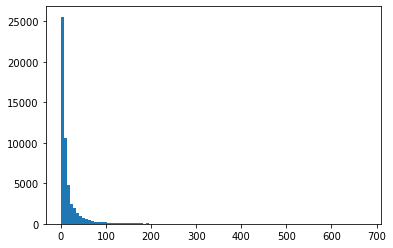

In [40]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

idxs = np.array(list(map(lambda x: x['review_idx'], tqdm_notebook(new_data))))
sizes = np.array(list(map(lambda x: len(x['cleaned']), tqdm_notebook(new_data))))
plt.hist(sizes, bins=100);

In [41]:
other = list(sorted(set(map(lambda x: x['review_idx'], tqdm_notebook(data))) - set(map(lambda x: x['review_idx'], tqdm_notebook(new_data)))))

  0%|          | 0/59305 [00:00<?, ?it/s]

  0%|          | 0/51875 [00:00<?, ?it/s]

In [42]:
import pickle
with open('other_reviews_idxs.pkl', 'wb') as f:
    pickle.dump(other, f, protocol=pickle.HIGHEST_PROTOCOL)
with open('zero_cleaned_idxs.pkl', 'wb') as f:
    pickle.dump(list(idxs[(sizes < 1)]), f, protocol=pickle.HIGHEST_PROTOCOL)

In [43]:
new_data = list(filter(lambda x: len(x['cleaned']) > 0, tqdm_notebook(new_data)))

  0%|          | 0/51875 [00:00<?, ?it/s]

In [44]:
import pickle
with open("cleaned_reviews.pkl", 'wb') as f:
    pickle.dump(new_data, f, protocol=pickle.HIGHEST_PROTOCOL)
with open("all_reviews.pkl", 'wb') as f:
    pickle.dump(data, f, protocol=pickle.HIGHEST_PROTOCOL)

In [45]:
del data
import gc
gc.collect()

15

In [46]:
new_data[0]

{'user_id': '76561197970982479',
 'user_idx': 0,
 'inner_review_idx': 0,
 'funny': '',
 'posted': 'Posted November 5, 2011.',
 'last_edited': '',
 'item_id': '1250',
 'helpful': 'No ratings yet',
 'recommend': True,
 'review': 'Simple yet with great replayability. In my opinion does "zombie" hordes and team work better than left 4 dead plus has a global leveling system. Alot of down to earth "zombie" splattering fun for the whole family. Amazed this sort of FPS is so rare.',
 'review_idx': 0,
 'spacy_processed': Simple yet with great replayability. In my opinion does "zombie" hordes and team work better than left 4 dead plus has a global leveling system. Alot of down to earth "zombie" splattering fun for the whole family. Amazed this sort of FPS is so rare.,
 'preprocessed': 'Simple yet with great replayability. In my opinion does "zombie" hordes and team work better than left 4 dead plus has a global leveling system. Alot of down to earth "zombie" splattering fun for the whole family.

In [47]:
import gensim
from gensim import corpora
# Create Dictionary
texts = list(map(lambda x: x['cleaned'], tqdm_notebook(new_data)))
id2word = corpora.Dictionary(texts)
id2word.filter_extremes(no_below=2, no_above=1.0)

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in tqdm_notebook(texts)]

# View
# print(corpus[:1])

  0%|          | 0/48385 [00:00<?, ?it/s]

  0%|          | 0/48385 [00:00<?, ?it/s]

In [48]:
# dict(id2word.id2token)

In [50]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=20, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [51]:
from pprint import pprint
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.382*"amazing" + 0.247*"story" + 0.110*"highly" + 0.058*"finish" + '
  '0.048*"puzzle" + 0.029*"hell" + 0.012*"episode" + 0.011*"solve" + '
  '0.008*"superb" + 0.007*"greatly"'),
 (1,
  '0.560*"would" + 0.298*"need" + 0.020*"suit" + 0.016*"defend" + '
  '0.015*"suppose" + 0.010*"dungeon" + 0.000*"could" + 0.000*"gun" + '
  '0.000*"mode" + 0.000*"old"'),
 (2,
  '0.200*"team" + 0.117*"zombie" + 0.075*"system" + 0.054*"whole" + '
  '0.042*"mechanic" + 0.039*"simply" + 0.035*"age" + 0.035*"gamer" + '
  '0.030*"playing" + 0.027*"title"'),
 (3,
  '0.634*"great" + 0.121*"keep" + 0.095*"cool" + 0.046*"short" + 0.021*"blow" '
  '+ 0.021*"laugh" + 0.007*"exploration" + 0.000*"could" + 0.000*"gun" + '
  '0.000*"mode"'),
 (4,
  '0.282*"kill" + 0.237*"start" + 0.106*"base" + 0.060*"feature" + '
  '0.054*"match" + 0.038*"decide" + 0.035*"personally" + 0.028*"chicken" + '
  '0.022*"animal" + 0.020*"planet"'),
 (5,
  '0.143*"back" + 0.105*"right" + 0.086*"let" + 0.083*"open" + 0.065*"second" 

In [52]:
from gensim.models.coherencemodel import CoherenceModel
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=texts, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -15.768940733175818

Coherence Score:  0.3408295658572138


In [81]:
lda_model[corpus][0]

/home/nizhikebinesi/fixed/classic-ml/venv_my/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


([(0, 0.016477132),
  (1, 0.015281212),
  (2, 0.18850166),
  (3, 0.034362882),
  (4, 0.014272417),
  (5, 0.041017797),
  (7, 0.072780244),
  (8, 0.011632212),
  (9, 0.02806989),
  (10, 0.015010347),
  (12, 0.44117597),
  (13, 0.016808346),
  (14, 0.01788874),
  (15, 0.015602922),
  (16, 0.01088448),
  (17, 0.016377851),
  (18, 0.014852451),
  (19, 0.025057383)],
 [(0, []),
  (1, [5]),
  (2, [2]),
  (3, [2]),
  (4, [2]),
  (5, [3]),
  (6, [2]),
  (7, [2]),
  (8, [2]),
  (9, [9]),
  (10, [2]),
  (11, [2]),
  (12, [12]),
  (13, [2]),
  (14, []),
  (15, [2]),
  (16, [2]),
  (17, [12]),
  (18, [2]),
  (19, [12]),
  (20, [5]),
  (21, [2])],
 [(0, []),
  (1, [(5, 0.9999379)]),
  (2, [(2, 0.9999018)]),
  (3, [(2, 0.9999516)]),
  (4, [(2, 0.99990773)]),
  (5, [(3, 0.9999934)]),
  (6, [(2, 0.9998703)]),
  (7, [(2, 0.9999072)]),
  (8, [(2, 0.99989516)]),
  (9, [(9, 0.99988157)]),
  (10, [(2, 0.9999578)]),
  (11, [(2, 0.99985033)]),
  (12, [(12, 0.9999124)]),
  (13, [(2, 0.9999725)]),
  (14, []),


In [62]:
import pyLDAvis
import pyLDAvis.gensim
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

/home/nizhikebinesi/fixed/classic-ml/venv_my/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
12     0.376558  0.303577       1        1  53.181373
7      0.261072 -0.372843       2        1  10.932775
19     0.048419 -0.020781       3        1   3.602123
3      0.055417 -0.025496       4        1   2.622565
2     -0.005564 -0.001141       5        1   2.359187
14     0.012300 -0.007578       6        1   2.356025
13    -0.009064 -0.000395       7        1   2.336204
5     -0.017470  0.002135       8        1   2.309595
9     -0.020483  0.003008       9        1   2.308123
17    -0.002530 -0.002399      10        1   2.234203
0     -0.029635  0.005078      11        1   2.109208
18    -0.037441  0.007638      12        1   2.072546
10    -0.018480  0.002230      13        1   2.053737
15    -0.040649  0.007916      14        1   2.039411
4     -0.029812  0.005274      15        1   2.037028
1     -0.024713  0.003549      16        1   1.962134
8     -0.070675  0.015034      17        1   1.516486
16    -0.073659  0.015606      18        1   1.447865
6     -0.183171  0.030651      19        1   0.507521
11    -0.190422  0.028934      20        1   0.011894, topic_info=           Term          Freq          Total Category  logprob  loglift
32         game  114901.00000  114901.000000  Default   30.000  30.0000
5         great   14426.00000   14426.000000  Default   29.000  29.0000
95        would    9548.00000    9548.000000  Default   28.000  28.0000
27          buy    8484.00000    8484.000000  Default   27.000  27.0000
269     amazing    6987.00000    6987.000000  Default   26.000  26.0000
...         ...           ...            ...      ...      ...      ...
9781  anticheat       0.00705       1.887556  Topic20   -9.592   3.4468
9782    fascist       0.00705       1.887557  Topic20   -9.592   3.4468
9757     forage       0.00705       1.887558  Topic20   -9.592   3.4468
9755   activite       0.00705       1.887556  Topic20   -9.592   3.4468
9841        lsd       0.00705       1.887556  Topic20   -9.592   3.4468

[904 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
689       7  0.998164       'd
415      15  0.971211       3d
131       3  0.993524      Can
631      10  0.991500     More
700       7  0.998278  ability
...     ...       ...      ...
95       16  0.999830    would
414      12  0.976595  writing
20        8  0.998805      yet
21        5  0.999231   zombie
67       13  0.999473        ♥

[359 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[13, 8, 20, 4, 3, 15, 14, 6, 10, 18, 1, 19, 11, 16, 5, 2, 9, 17, 7, 12])

In [57]:
mallet_path = './mallet-2.0.8/bin/mallet' # update this path
ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=20, id2word=id2word)
# Show Topics
pprint(ldamallet.show_topics(formatted=False))

# Compute Coherence Score
coherence_model_ldamallet = CoherenceModel(model=ldamallet, texts=texts, dictionary=id2word, coherence='c_v')
coherence_ldamallet = coherence_model_ldamallet.get_coherence()
print('\nCoherence Score: ', coherence_ldamallet)

/home/nizhikebinesi/fixed/classic-ml/venv_my/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(11,
  [('game', 0.32221664994984955),
   ('time', 0.14568706118355065),
   ('play', 0.05350426278836509),
   ('long', 0.04598169508525577),
   ('year', 0.037800902708124376),
   ('wait', 0.032535105315947846),
   ('finish', 0.027520060180541626),
   ('back', 0.025608074222668004),
   ('age', 0.010751003009027081),
   ('short', 0.00993605817452357)]),
 (5,
  [('update', 0.041840895514635226),
   ('run', 0.035062202945225045),
   ('add', 0.03456873490377373),
   ('fix', 0.03355582681868945),
   ('bug', 0.032672778744513416),
   ('problem', 0.03033529854816508),
   ('work', 0.029270446458717504),
   ('issue', 0.025192842116198738),
   ('early', 0.024777290081292366),
   ('crash', 0.02301119393294029)]),
 (12,
  [('thing', 0.061282093035879066),
   ('lot', 0.058595234218096946),
   ('give', 0.048173478803669324),
   ('pretty', 0.04792921891114368),
   ('review', 0.041714161645768875),
   ('people', 0.038213103186234595),
   ('bit', 0.031102426314932423),
   ('feel', 0.031075286326874015)

In [63]:
import gensim    
model = gensim.models.wrappers.ldamallet.malletmodel2ldamodel(ldamallet)
import pyLDAvis
import pyLDAvis.gensim
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(model, corpus, id2word)
vis

/home/nizhikebinesi/fixed/classic-ml/venv_my/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
13    -0.200765 -0.058321       1        1  6.152532
3     -0.186614  0.051741       2        1  5.649992
17    -0.144859 -0.266793       3        1  5.598325
10    -0.163257  0.015335       4        1  5.515290
9     -0.169964 -0.159207       5        1  5.429095
6     -0.172570 -0.111015       6        1  5.364985
5     -0.143378  0.091865       7        1  5.330788
12    -0.083051 -0.051849       8        1  5.303997
14    -0.012312 -0.167681       9        1  5.191902
18    -0.147520  0.198002      10        1  5.126937
2     -0.180732  0.161087      11        1  5.089517
4      0.084181 -0.054496      12        1  4.975915
11     0.263239 -0.015020      13        1  4.654918
7      0.037822  0.114526      14        1  4.579264
16     0.281824  0.052651      15        1  4.471935
19     0.228259 -0.022806      16        1  4.434964
1      0.329772 -0.000699      17        1  4.357288
0      0.208123 -0.043167      18        1  4.355481
8     -0.121694  0.225257      19        1  4.306105
15     0.293496  0.040591      20        1  4.110771, topic_info=       Term          Freq         Total Category  logprob  loglift
32     game  77190.000000  77190.000000  Default  30.0000  30.0000
86     play  22661.000000  22661.000000  Default  29.0000  29.0000
5     great  10684.000000  10684.000000  Default  28.0000  28.0000
27      buy   6768.000000   6768.000000  Default  27.0000  27.0000
203    make  10360.000000  10360.000000  Default  26.0000  26.0000
...     ...           ...           ...      ...      ...      ...
5     great   1195.549181  10684.554840  Topic20  -3.3962   1.0014
931     ton    181.478235    420.319681  Topic20  -5.2814   2.3517
2235   mate    136.108676    364.660918  Topic20  -5.5691   2.2060
486    type    155.727945    887.256622  Topic20  -5.4344   1.4515
2538  party    104.227364    235.603319  Topic20  -5.8360   2.3760

[1728 rows x 6 columns], token_table=       Topic      Freq      Term
term                            
6919       4  0.962968  "fallout
689        3  0.002385        'd
689        5  0.122842        'd
689        8  0.875400        'd
5525       9  1.185271    .every
...      ...       ...       ...
8440      18  1.095528       zen
21        11  0.999094    zombie
21        19  0.000568    zombie
12860     12  1.003695         ▄
67        19  0.999893         ♥

[2566 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[14, 4, 18, 11, 10, 7, 6, 13, 15, 19, 3, 5, 12, 8, 17, 20, 2, 1, 9, 16])

In [65]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in tqdm_notebook(range(start, limit, step)):
        model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

/home/nizhikebinesi/fixed/classic-ml/venv_my/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [67]:
%%time
# Can take a long time to run.
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=texts, start=2, limit=40, step=1)

/home/nizhikebinesi/fixed/classic-ml/venv_my/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-65-ccca779b921e>:19: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for num_topics in tqdm_notebook(range(start, limit, step)):


  0%|          | 0/38 [00:00<?, ?it/s]

CPU times: user 3min 18s, sys: 33.1 s, total: 3min 52s
Wall time: 32min 58s


/home/nizhikebinesi/fixed/classic-ml/venv_my/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


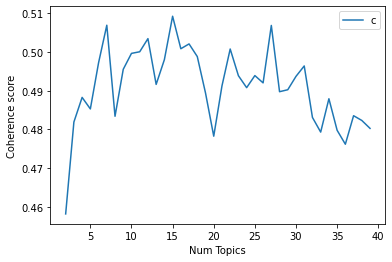

In [68]:
# Show graph
limit=40; start=2; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [69]:
tmp = list(sorted(zip(model_list, coherence_values), key=lambda x: -x[1]))

/home/nizhikebinesi/fixed/classic-ml/venv_my/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [70]:
tmp[0]

/home/nizhikebinesi/fixed/classic-ml/venv_my/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(<gensim.models.wrappers.ldamallet.LdaMallet at 0x7faae8a22760>,
 0.5092020948858542)

In [71]:
import gensim    
model = gensim.models.wrappers.ldamallet.malletmodel2ldamodel(tmp[0][0])
import pyLDAvis
import pyLDAvis.gensim
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(model, corpus, id2word)
vis

/home/nizhikebinesi/fixed/classic-ml/venv_my/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
13     0.213982  0.122859       1        1  7.961863
11     0.194452  0.209968       2        1  7.695323
8      0.202481 -0.136621       3        1  7.377467
12     0.178263  0.230695       4        1  7.216482
0      0.150242 -0.234925       5        1  6.906242
2      0.124802 -0.024149       6        1  6.840154
7      0.180903 -0.159887       7        1  6.782884
10    -0.082585 -0.173454       8        1  6.664762
5     -0.180481 -0.043871       9        1  6.653539
6      0.031899  0.122475      10        1  6.418400
9      0.003289 -0.050457      11        1  6.129615
4     -0.303217  0.046972      12        1  6.124773
3     -0.272576  0.021517      13        1  6.000780
14    -0.191211 -0.033635      14        1  5.704983
1     -0.250244  0.102512      15        1  5.522733, topic_info=            Term          Freq         Total Category  logprob  loglift
32          game  76371.000000  76371.000000  Default  30.0000  30.0000
86          play  22589.000000  22589.000000  Default  29.0000  29.0000
5          great  10317.000000  10317.000000  Default  28.0000  28.0000
27           buy   6944.000000   6944.000000  Default  27.0000  27.0000
203         make  10362.000000  10362.000000  Default  26.0000  26.0000
...          ...           ...           ...      ...      ...      ...
268       action    391.664057   1041.734258  Topic15  -4.8074   1.9181
1540    favorite    171.720577    316.059137  Topic15  -5.6319   2.2862
654    excellent    224.648153    557.902206  Topic15  -5.3633   1.9866
47        friend    553.975288   4147.675040  Topic15  -4.4607   0.8831
912   absolutely    109.383656    749.323315  Topic15  -6.0830   0.9720

[1249 rows x 6 columns], token_table=       Topic      Freq     Term
term                           
689        4  0.167879       'd
689        5  0.140299       'd
689        6  0.265009       'd
689        8  0.426892       'd
6645       6  0.978484    1080p
...      ...       ...      ...
1840       2  0.012135  youtube
1840       8  0.982946  youtube
21         7  1.000074   zombie
12860     11  0.998511        ▄
67        14  1.000088        ♥

[1753 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[14, 12, 9, 13, 1, 3, 8, 11, 6, 7, 10, 5, 4, 15, 2])

In [73]:
import pandas as pd
def format_topics_sentences(ldamodel=model, corpus=corpus, texts=texts):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(tqdm_notebook(ldamodel[corpus])):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic, 4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=model, corpus=corpus, texts=texts)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic.head(10)

/home/nizhikebinesi/fixed/classic-ml/venv_my/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-73-ec9a405b7e11>:7: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i, row in enumerate(tqdm_notebook(ldamodel[corpus])):


  0%|          | 0/48385 [00:00<?, ?it/s]

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,7.0,0.1193,"kill, die, zombie, shoot, guy, man, run, leave...","[simple, yet, great, replayability, opinion, z..."
1,1,12.0,0.0873,"story, character, feel, interesting, short, mu...","[unique, worth, playthrough]"
2,2,12.0,0.0973,"story, character, feel, interesting, short, mu...","[great, atmosphere, gunplay, bit, chunky, time..."
3,3,11.0,0.1423,"feel, level, gameplay, combat, experience, mec...","[know, think, see, title, intimidate, title, e..."
4,4,10.0,0.1556,"make, game, thing, lot, bit, hard, pretty, peo...","[simple, actually, simple, truck, drive, relax..."
5,5,3.0,0.1196,"play, game, hour, time, spend, long, car, pret...","[little, game, play, bore, time, passer, gud, ..."
6,6,11.0,0.1243,"feel, level, gameplay, combat, experience, mec...","[suitably, punish, roguelike, platformer, winn..."
7,7,10.0,0.0815,"make, game, thing, lot, bit, hard, pretty, peo...","[run, hell, kind]"
8,8,12.0,0.1144,"story, character, feel, interesting, short, mu...","[elegant, integration, gameplay, story, world,..."
9,9,13.0,0.1022,"weapon, enemy, gun, skill, point, class, level...","[random, drop, random, quest, stat, point, ani..."


In [74]:
# Number of Documents for Each Topic
topic_counts = df_topic_sents_keywords['Dominant_Topic'].value_counts()

# Percentage of Documents for Each Topic
topic_contribution = round(topic_counts/topic_counts.sum(), 4)

# Topic Number and Keywords
topic_num_keywords = df_topic_sents_keywords[['Dominant_Topic', 'Topic_Keywords']]

# Concatenate Column wise
df_dominant_topics = pd.concat([topic_num_keywords, topic_counts, topic_contribution], axis=1)

# Change Column names
df_dominant_topics.columns = ['Dominant_Topic', 'Topic_Keywords', 'Num_Documents', 'Perc_Documents']

# Show
df_dominant_topics

/home/nizhikebinesi/fixed/classic-ml/venv_my/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Dominant_Topic,Topic_Keywords,Num_Documents,Perc_Documents
0.0,7.0,"kill, die, zombie, shoot, guy, man, run, leave...",3181.0,0.0657
1.0,12.0,"story, character, feel, interesting, short, mu...",5546.0,0.1146
2.0,12.0,"story, character, feel, interesting, short, mu...",3178.0,0.0657
3.0,11.0,"feel, level, gameplay, combat, experience, mec...",3167.0,0.0655
4.0,10.0,"make, game, thing, lot, bit, hard, pretty, peo...",3338.0,0.0690
...,...,...,...,...
48380.0,12.0,"story, character, feel, interesting, short, mu...",NaN,NaN
48381.0,14.0,"game, fuckshit, ♥, life, bitch, year, simulato...",NaN,NaN
48382.0,9.0,"buy, worth, free, money, game, pay, steam, pri...",NaN,NaN
48383.0,4.0,"game, enjoy, play, recommend, fan, favourite, ...",NaN,NaN


In [75]:
import pickle
id2word.save("id2word_actual.pkl", pickle_protocol=pickle.HIGHEST_PROTOCOL)

/home/nizhikebinesi/fixed/classic-ml/venv_my/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [103]:
def mallet_to_lda(mallet_model):
    model_gensim = gensim.models.ldamodel.LdaModel(
        id2word=mallet_model.id2word, num_topics=mallet_model.num_topics,
        alpha=mallet_model.alpha, eta=0, iterations=1000,
        gamma_threshold=0.001,
        dtype=np.float32, per_word_topics=True,
    )
    model_gensim.sync_state()
    model_gensim.state.sstats = mallet_model.wordtopics
    return model_gensim

/home/nizhikebinesi/fixed/classic-ml/venv_my/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [104]:
tmp_model = mallet_to_lda(tmp[0][0])

/home/nizhikebinesi/fixed/classic-ml/venv_my/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [185]:
# Sentence Coloring of N Sentences
from matplotlib.patches import Rectangle
import matplotlib.colors as mcolors

def sentences_chart(lda_model=lda_model, corpus=corpus, start = 0, end = 13, max_words=14, font_size=12):
    corp = corpus[start:end]
    mycolors = [color for name, color in mcolors.TABLEAU_COLORS.items()]

    fig, axes = plt.subplots(end-start, 1, figsize=(20, (end-start)*0.95), dpi=160)       
    axes[0].axis('off')
    for i, ax in enumerate(axes):
        if i > 0:
            corp_cur = corp[i-1] 
            topic_percs, wordid_topics, wordid_phivalues = lda_model[corp_cur]
            word_dominanttopic = [(lda_model.id2word[wd], topic[0]) for wd, topic in wordid_topics]
            ax.text(0.01, 0.5, "Doc " + str(i-1) + ": ", verticalalignment='center',
                    fontsize=16, color='black', transform=ax.transAxes, fontweight=700)

            # Draw Rectange
            topic_percs_sorted = sorted(topic_percs, key=lambda x: x[1], reverse=True)
#             print(topic_percs_sorted)
            ax.add_patch(Rectangle((0.0, 0.05), 0.99, 0.90, fill=None, alpha=1, 
                                   color=mycolors[topic_percs_sorted[0][0] % len(mycolors)], linewidth=2))

            word_pos = 0.06
            ellipsis = False
            for j, (word, topics) in enumerate(word_dominanttopic):
                if j < max_words:
                    ax.text(word_pos, 0.5, word,
                            horizontalalignment='left',
                            verticalalignment='center',
                            fontsize=font_size, color=mycolors[topics % len(mycolors)],
                            transform=ax.transAxes, fontweight=700)
                    word_pos += .008 * len(word)  # to move the word for the next iter
                    ax.axis('off')
                else:
                    ellipsis = True
                    break
            if ellipsis:
                ax.text(word_pos, 0.5, '. . .',
                        horizontalalignment='left',
                        verticalalignment='center',
                        fontsize=font_size, color='black',
                        transform=ax.transAxes)       

    plt.subplots_adjust(wspace=0, hspace=0)
    plt.suptitle('Sentence Topic Coloring for Documents: ' + str(start) + ' to ' + str(end-2), fontsize=22, y=0.95, fontweight=700)
    plt.tight_layout()
    plt.show()   


/home/nizhikebinesi/fixed/classic-ml/venv_my/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/home/nizhikebinesi/fixed/classic-ml/venv_my/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


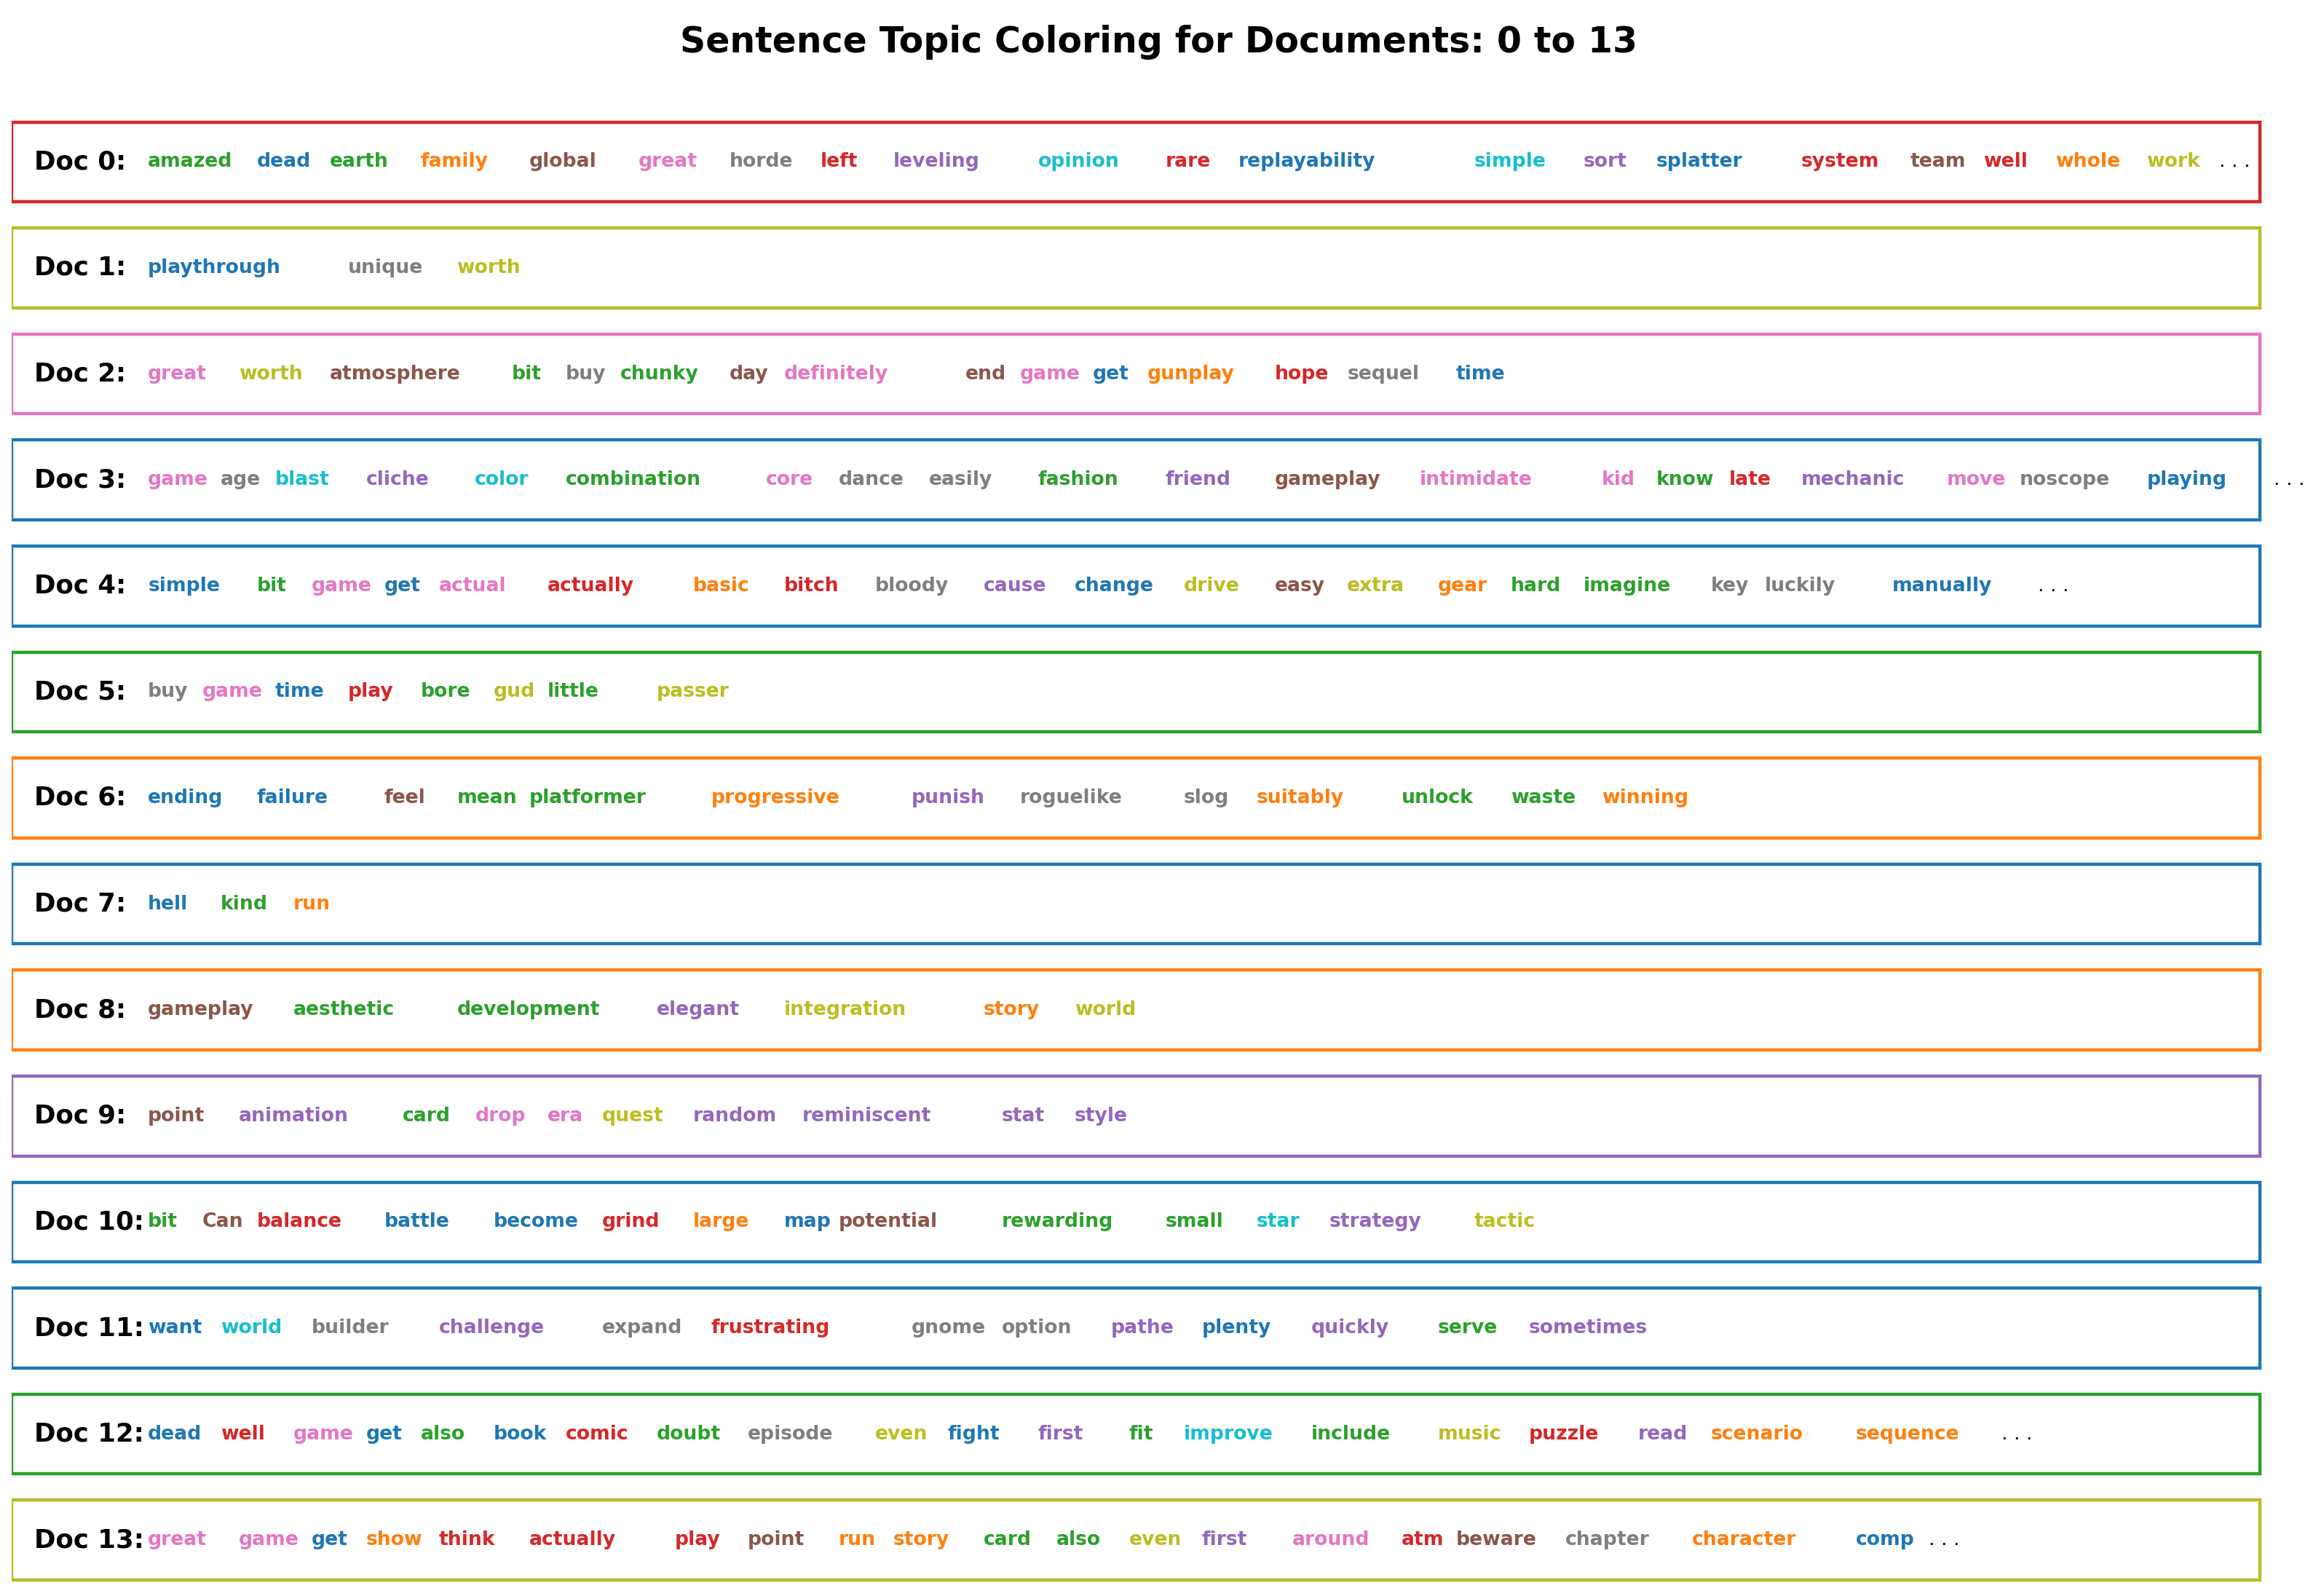

In [186]:
sentences_chart(tmp_model, corpus, start=0, end=15, max_words=20);

In [ ]:
x = tmp[0][0]
x.ph

In [85]:
x.

/home/nizhikebinesi/fixed/classic-ml/venv_my/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


'/tmp/a1714a_wordweights.txt'